In [1]:
# -*- coding: utf-8 -*-
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


In [2]:
%matplotlib inline

In [3]:
#设置图片的大小
matplotlib.rcParams['figure.figsize'] = (12,10)

numpy.dot的符号表示：假设要计算$\theta=(X^{T}X)^{-1}X^{T}y$，通常情况下这样计算：theta=np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)，可以使用@符号替代numpy.dot函数，使用@替代的theta如下：<br/>
theta=np.linalg.inv(X.T @ X) @ X.T @ y<br/>举例如下：


In [4]:
X = np.random.randint(50,200,size=(200,5)) # 200 * 5
y = np.random.randint(20000,45000,size=(200,1)) # 200 * 1

In [5]:
theta = np.linalg.inv(X.T @ X) @ X.T @ y

In [6]:
print(theta.shape)
print(theta)

(5, 1)
[[35.40280178]
 [60.87671999]
 [57.38466445]
 [58.56493623]
 [42.49710505]]


(待完善)矩阵求导：

In [9]:
A = np.random.randint(1,5,size=(5,4))

In [ ]:
A = np.random.randint

逻辑回归模型的假设是$h_{\theta}(x) = g(\theta^{T}X)$,其中$X$代表特征向量，$g$代表逻辑函数（logistics function），它是一个常用的S型逻辑函数，其公式表示为：$g(x) = \frac{1}{1+e^{-x}}$, 使用Python实现如下：

In [10]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

Text(0.5, 1.0, 'sigmoid函数')

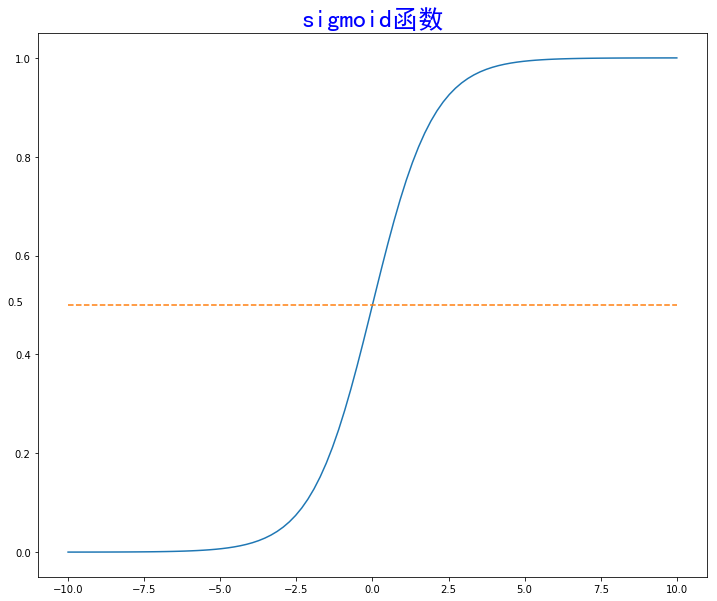

In [11]:
x = np.linspace(-10,10,100)
plt.subplots()
plt.plot(x, sigmoid(x))
y_5 = [0.5] * 100
plt.plot(x, y_5, '--')
plt.text(x=-12,y=0.5, s='0.5')
plt.title("sigmoid函数", fontproperties="SimHei", fontsize=26, color='blue')

线性回归的代价函数是：$J(\theta)=\frac{1}{m}\sum\limits_{i=1}^{m}\frac{1}{2}(x^{(i)}-y^{(i)})^{2}$<br>
我们重新定义逻辑回归的代价函数为：$J(\theta)=\frac{1}{m}\sum\limits_{i=1}^{m}Cost(h_{\theta}(x^{(i)}), y^{(i)})$,其中<br>
$$Cost(h_{\theta}(x), y)=\left\{
\begin{aligned}
 -log(h_{\theta}(x))  \;\;  if \; y=1 \\
 -log(1-h_{\theta}(x)) \;\;  if \; y=0 \\
\end{aligned}
\right.
$$

In [13]:
from sklearn.datasets import fetch_olivetti_faces

In [14]:
n_row, n_col = 2,3
n_components = n_row * n_col
img_shape = (64,64)

In [15]:
dataset = fetch_olivetti_faces(shuffle=True, random_state=np.random.RandomState(0))

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\John\scikit_learn_data


In [16]:
faces = dataset.data

In [20]:
#绘图
def plot_images(title, images, n_col=n_col, n_row=n_row):
    plt.figure(figsize=(2.0 * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
        
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i+1)
        vmax = max(comp.max(), -comp.min())
        
        plt.imshow(comp.reshape(img_shape), cmap=plt.cm.gray,
                  interpolation='nearest', vmin=-vmax, vmax=vmax)
        plt.xticks(())#去除坐标轴标签
        plt.yticks(())#去除坐标轴标签
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04,0.0)
        

In [21]:
from sklearn.decomposition import PCA, NMF

In [22]:
estimators = [('Eigenfaces - PCA using randomized SVD', PCA(n_components=6, whiten=True)),
              ('Non-negative components - NMF', NMF(n_components=6, init='nndsvda', tol=5e-3))]

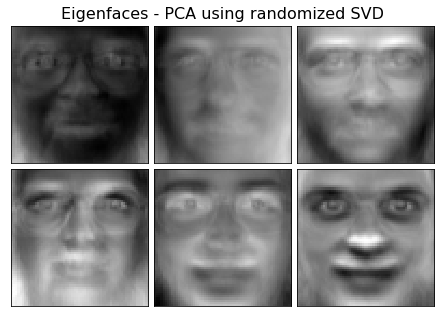

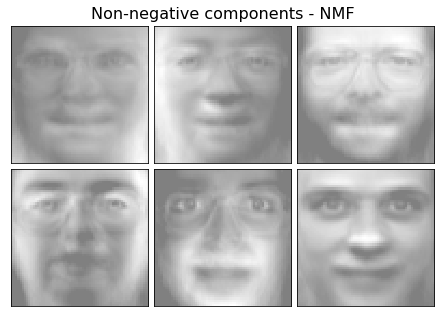

In [23]:
for name, estimator in estimators:
    estimator.fit(faces)
    components_ = estimator.components_
    plot_images(name, components_[:n_components])
    
plt.show()

In [28]:
import PIL.Image as image
def load_data(path):
    with open(path, 'rb') as f:
        data = []
        img = image.open(f)
        m, n = img.size
        for i in range(m):
            for j in range(n):
                x,y,z = img.getpixel((i,j))
                data.append([x/256.0, y/256.0, z/256.0])
    return np.mat(data),m,n
img_data, row, col = load_data('./dog.jpg')

In [42]:
from sklearn.cluster import KMeans
import PIL.ImageColor as ImageColor

In [43]:

km = KMeans(n_clusters=3)
label = km.fit_predict(img_data)
label = label.reshape([row,col])
pic_new = image.new('L', (row, col))

for i in range(row):
    for j in range(col):
        pic_new.putpixel((i,j), 256 / (label[i,j] + 1))
pic_new.save('result-dog.jpg', 'JPEG')

SystemError: new style getargs format but argument is not a tuple

In [33]:
label.shape

(990, 660)

In [37]:
pic_new.putpixel?

660

### 2. Isomap算法，等度量映射

>Isomap算法核心在于发现并利用流形空间的特点，引入测地线距离和提出对应的距离计算方法。
#### 流形
流形是在局部区域与欧氏空间同胚的空间，即在局部区域具有欧氏空间的性质，能用欧氏距离来进行距离计算。下面两幅流形图片可以给你一个直观的认识
#### 数据结构-图论：计算两点间的最短距离
有一定数据结构基础的朋友一定知道，这个问题通常用来求解的算法是：迪杰斯特拉和弗洛伊德算法。在此，我强调的是它们各自的前提条件，Dijkstra算法要求图中路径长度必须大于等于0，Floyd算法只要求没有总和小于0的环路。庆幸地是，在Isomap算法中不存在这两种异常情况。
#### 算法思想
Isomap算法没有多少公式推导的内容，它的创新点是引入测地线距离和提出对应的距离计算方法。此算法出发点，是认识到流形在高维空间中，两个样本之间的距离不该直接使用欧式距离计算直线距离，更应该是采用“测地线”距离：就像我们日常生活中送快递的例子，两个城市之间如果没有直达的路线，快递就会经过许多中转站才能送到。测地线距离就是讲这样的距离，下图中的红线和黑线可以直观地告诉你测地线距离与直线距离的区别。
#### 算法步骤

输入：样本集$D={x_1,x_2,..,x_m}$；近邻参数$k$；低维空间维数$d^{'}$。
过程：

1：for i=1,2,...,m do <br>
2：    确定$x_i$的$k$近邻； <br>
3：    $x_i$与$k$近邻点之间的距离设置为欧式距离，与其他点的距离设置为无穷大； <br>
4：end for <br>
5：调用最短路径算法计算较远两个样本点之间的距离$dist_{ij}$； <br>
6：将距离矩阵$Dist$作为MDS算法的输入； <br>
7：return MDS算法的输出 <br>
输出：样本集在低维空间的投影$Z={z_1,z_2,...,z_m}$。 <br>

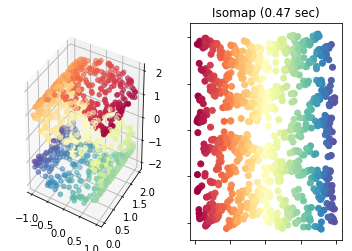

In [4]:
"""
Isomap : Isometric mapping
Refercences :
[1]周志华.机器学习[M].清华大学出版社,2016:425.
[2]http://scikit-learn.sourceforge.net/dev/modules/generated/sklearn.manifold.Isomap.html

Author : Ggmatch
Date : 2019/4/12
"""
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# 制造样本
n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10

fig = plt.figure(figsize=(6, 4))  #画板
gs = fig.add_gridspec(1,2)  #共2副子图
ax1 = fig.add_subplot(gs[0,0], projection='3d')  #第一幅子图表示原始样本分布
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)

# Isomap降维
n_components = 2

t0 = time()  #计时开始
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()  #计时结束
ax2 = fig.add_subplot(gs[0,1])
ax2.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)  #第2副子图表示降维后样本分布
ax2.set_title("Isomap (%.2g sec)" % (t1 - t0))
ax2.xaxis.set_major_formatter(NullFormatter())
ax2.yaxis.set_major_formatter(NullFormatter())

plt.show()

In [3]:
from pyecharts import GeoLines, Style
style = Style(title_top="#fff",title_pos = "center",width=1200,height=600,background_color="#404a59")
style_geo = style.add(is_label_show=True,line_curve=0.2,line_opacity=0.6,legend_text_color="#eee",
legend_pos="right",geo_effect_symbol="plane",geo_effect_symbolsize=15,label_color=['#a6c84c', '#ffa022', '#46bee9'],
label_pos="right",label_formatter="{b}",label_text_color="#eee",)
data_guangzhou = [
 ["广州", "上海"],
 ["广州", "北京"],
 ["广州", "南京"],    
 ["广州", "重庆"],
 ["广州", "兰州"],
 ["广州", "杭州"]
]
geolines = GeoLines("GeoLines 示例", **style.init_style)
geolines.add("从广州出发", data_guangzhou, **style_geo)
geolines.render()

ImportError: cannot import name 'GeoLines'